<a href="https://colab.research.google.com/github/parkhy0106/HolyMoly/blob/master/Graph(molecular)-neural-network/LanczosNet_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lrjconan/LanczosNetwork.git

Cloning into 'LanczosNetwork'...
remote: Enumerating objects: 158, done.
remote: Total 158 (delta 0), reused 0 (delta 0), pack-reused 158
Receiving objects: 100% (158/158), 71.29 KiB | 5.94 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
cd LanczosNetwork/

/content/LanczosNetwork


#Setup for preprocessing data

In [ ]:
!pip install pysmiles

  Using cached pbr-5.6.0-py2.py3-none-any.whl (111 kB)
  Created wheel for pysmiles: filename=pysmiles-1.0.1-py2.py3-none-any.whl size=22028 sha256=f2bac92b9af873810c55ad4242c5351c12ff65c6287d883afcd7868d81fd6d7d
  Stored in directory: /root/.cache/pip/wheels/e4/f0/ca/dae2e932684a6e26824d29cf5b6dadea7320e6fed036942972
Successfully built pysmiles


In [ ]:
!pip install imgaug==0.2.5

     |████████████████████████████████| 562 kB 7.7 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561438 sha256=47d615586628160963a3f204b80bac9024faf6e5e09e42f6d70c33a4512129a4
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004990bccb0f27985c74ba26e49
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 1.7 MB 7.8 MB/s 
     |████████████████████████████████| 124 kB 56.1 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=5e07f79466855f5d72d748b26348f981bc47ddbe84384dee82ece2760b002f00
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.2
    Uninstalling networkx-2.6.2:
      Successfully uninstalled networkx-2.6.2


In [ ]:
! ./setup.sh

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: data/QM8/preprocess/QM8_preprocess_train_0013526.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0002479.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0008639.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0001091.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0000329.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0012480.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0014739.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0006691.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0010820.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0003350.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0000441.p  
  inflating: data/QM8/preprocess/QM8_preprocess_dev_0000593.p  
  inflating: data/QM8/preprocess/QM8_preprocess_train_0006297.p  
  inflating: data/QM8/preprocess/QM8_preprocess_dev_0000054.p  
  inflating: data/QM8/preprocess/QM8_preproc

In [ ]:
import pickle
with open('/content/LanczosNetwork/data/QM8/preprocess/QM8_preprocess_dev_0000000.p', 'rb') as f:
  data = pickle.load(f)

In [ ]:
from pysmiles import read_smiles
import networkx as nx

smiles = 'CC(=O)Nc1ccc(C(=O)[C@H](C)Sc2nnc(C3CCCCC3)o2)cc1'
mol = read_smiles(smiles)

# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol))

Atom "[C@H]" contains stereochemical information that will be discarded.


[(0, 'C'), (1, 'C'), (2, 'O'), (3, 'N'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'O'), (10, 'C'), (11, 'C'), (12, 'S'), (13, 'C'), (14, 'N'), (15, 'N'), (16, 'C'), (17, 'C'), (18, 'C'), (19, 'C'), (20, 'C'), (21, 'C'), (22, 'C'), (23, 'O'), (24, 'C'), (25, 'C')]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


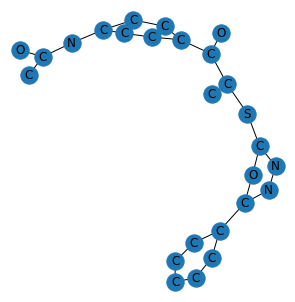

In [ ]:
import matplotlib.pyplot as plt
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

In [ ]:
!python run_exp.py -c config/graph_lanczos_net.yaml

INFO  | 2021-08-19 11:33:54,793 | run_exp.py                | line 27   : Writing log file to exp/graph_lanczos_net/LanczosNetGeneral_synthetic_2021-Aug-19-11-33-54_475/log_exp_475.txt
INFO  | 2021-08-19 11:33:54,793 | run_exp.py                | line 28   : Exp instance id = 475
INFO  | 2021-08-19 11:33:54,793 | run_exp.py                | line 29   : Exp comment = None
INFO  | 2021-08-19 11:33:54,793 | run_exp.py                | line 30   : Config =
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
{'dataset': {'data_path': 'data/synthetic',
             'graph_emb_dim': 2,
             'loader_name': 'GraphData',
             'name': 'synthetic',
             'node_emb_dim': 10,
             'num_edge_type': 1},
 'exp_dir': 'exp/graph_lanczos_net',
 'exp_name': 'LanczosNetGeneral_synthetic_2021-Aug-19-11-33-54_475',
 'gpus': [0],
 'model': {'hidden_dim': [128, 128, 128, 128, 128, 128, 128],
           'input_dim': 10,
           'long_diffusion_dist':